In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

df = pd.read_csv('/kaggle/input/cleaned-airbnb-data/cleaned_airbnb_data.csv')
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19 00:00:00,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,No Review,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05 00:00:00,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00,0.10,1,0


In [2]:
cluster_features = [
    "price",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
    "latitude",
    "longitude"
]

X_cluster = df[cluster_features].copy()


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


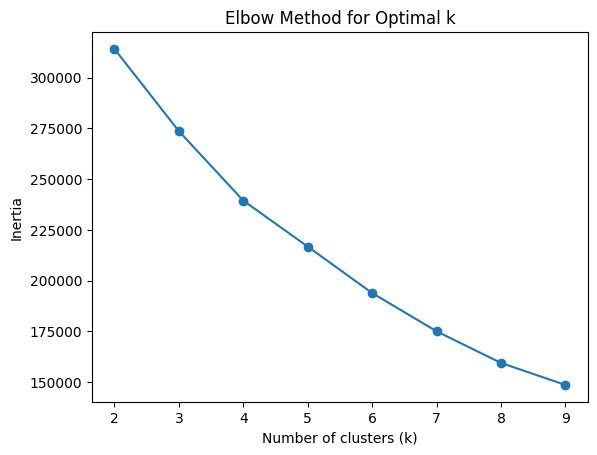

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [5]:
k = 4  # adjust based on elbow
kmeans = KMeans(n_clusters=k, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

In [6]:
df.groupby("cluster")[cluster_features].mean().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,latitude,longitude
cluster,,,,,,,,
0,117.63,4.76,8.66,0.51,1.68,22.02,40.73,-73.96
1,235.95,21.79,2.15,0.67,289.17,281.96,40.73,-74.00
2,110.83,2.45,98.31,3.92,2.12,151.71,40.73,-73.94
3,126.81,14.49,14.27,0.77,10.14,286.92,40.73,-73.94


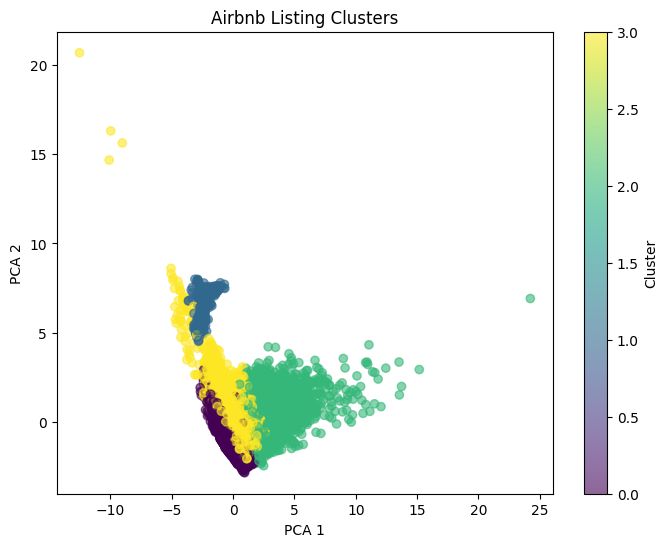

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df["pca1"] = pca_result[:,0]
df["pca2"] = pca_result[:,1]

plt.figure(figsize=(8,6))
plt.scatter(df["pca1"], df["pca2"], c=df["cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Airbnb Listing Clusters")
plt.colorbar(label="Cluster")
plt.show()


In [8]:
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)


In [9]:
df_encoded = pd.get_dummies(df, columns=['room_type', 'neighbourhood_group'], drop_first=True)


In [10]:
cluster_summary = df.groupby("cluster").agg({
    "price": "mean",
    "number_of_reviews": "mean",
    "availability_365": "mean",
    "room_type": lambda x: x.mode()[0],
    "neighbourhood_group": lambda x: x.mode()[0]
}).round(2)

cluster_summary


,price,number_of_reviews,availability_365,room_type,neighbourhood_group
cluster,,,,,
0,117.63,8.66,22.02,Entire home/apt,Brooklyn
1,235.95,2.15,281.96,Entire home/apt,Manhattan
2,110.83,98.31,151.71,Private room,Brooklyn
3,126.81,14.27,286.92,Entire home/apt,Manhattan


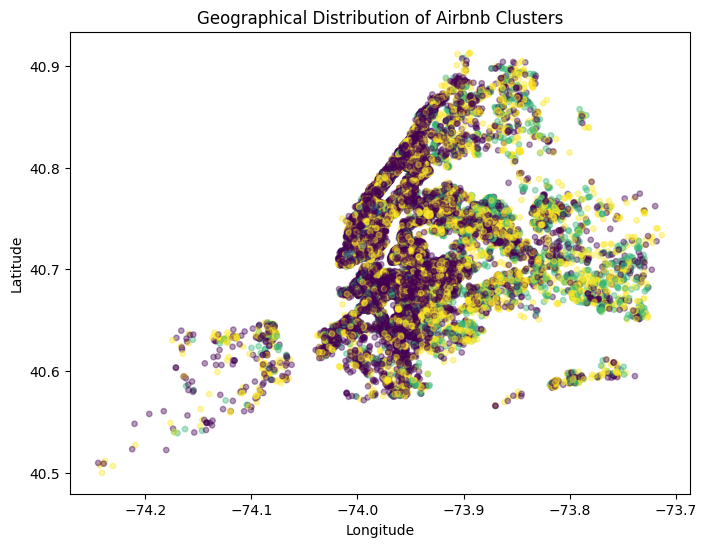

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df["longitude"], df["latitude"], c=df["cluster"], cmap="viridis", alpha=0.4, s=15)
plt.title("Geographical Distribution of Airbnb Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [12]:
cluster_labels = {
    0: "Mid-priced & Fully Booked",
    1: "Luxury Listings (Low Demand)",
    2: "Budget High-Demand Rooms",
    3: "Mid-priced Low-Demand"
}

df["cluster_label"] = df["cluster"].map(cluster_labels)
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,cluster,pca1,pca2,cluster_label
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19 00:00:00,0.21,6,365,3,-0.246237,1.028253,Mid-priced Low-Demand
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.38,2,355,3,-0.047888,1.734136,Mid-priced Low-Demand
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,No Review,0.00,1,365,3,-0.311292,0.791652,Mid-priced Low-Demand
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05 00:00:00,4.64,1,194,2,4.924250,1.380383,Budget High-Demand Rooms
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00,0.10,1,0,0,-0.641489,-0.920248,Mid-priced & Fully Booked


In [13]:
df.to_csv("airbnb_clusters.csv", index=False)


In [14]:
kmeans = KMeans(
    n_clusters=k,
    random_state=42,
    n_init="auto"   # or 10 to match old default
)
df["cluster"] = kmeans.fit_predict(X_scaled)
